In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#data, meta = pyreadstat.read_dta("../../data/earnings/heights.dta")
data = pd.read_csv("../../data/earnings.csv")

data = data.dropna(subset=["education"])

In [3]:
data.head()

,height,weight,male,earn,earnk,ethnicity,education,mom_ed,dad_ed,walk,exercise,smoke,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [4]:
cleaned_data = data[["height", "weight", "male", "earn", "earnk", "ethnicity", "education"]]

cleaned_data.head()

,height,weight,male,earn,earnk,ethnicity,education
0,74,210.0,1,50000.0,50.0,White,16.0
1,66,125.0,0,60000.0,60.0,White,16.0
2,64,126.0,0,30000.0,30.0,White,16.0
3,65,200.0,0,25000.0,25.0,White,17.0
4,63,110.0,0,50000.0,50.0,Other,16.0


In [5]:
target = data["earn"]
# Adicionando uma pequena constante para evitar valores de 0 em 'target'
if (target == 0).any():
    target_adjusted = target + 0.0001
else:
    target_adjusted = target

X = data["education"]

X = sm.add_constant(X)

In [6]:
# Refazendo o modelo com os valores ajustados
gamma_model_ed = sm.GLM(target_adjusted, X, family=sm.families.Gamma(sm.families.links.Log())).fit()
print(gamma_model_ed.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   earn   No. Observations:                 1814
Model:                            GLM   Df Residuals:                     1812
Model Family:                   Gamma   Df Model:                            1
Link Function:                    Log   Scale:                          1.0795
Method:                          IRLS   Log-Likelihood:                -19579.
Date:                Mon, 24 Jun 2024   Deviance:                       7761.7
Time:                        00:15:31   Pearson chi2:                 1.96e+03
No. Iterations:                    12   Pseudo R-squ. (CS):            0.09240
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2655      0.129     64.245      0.0

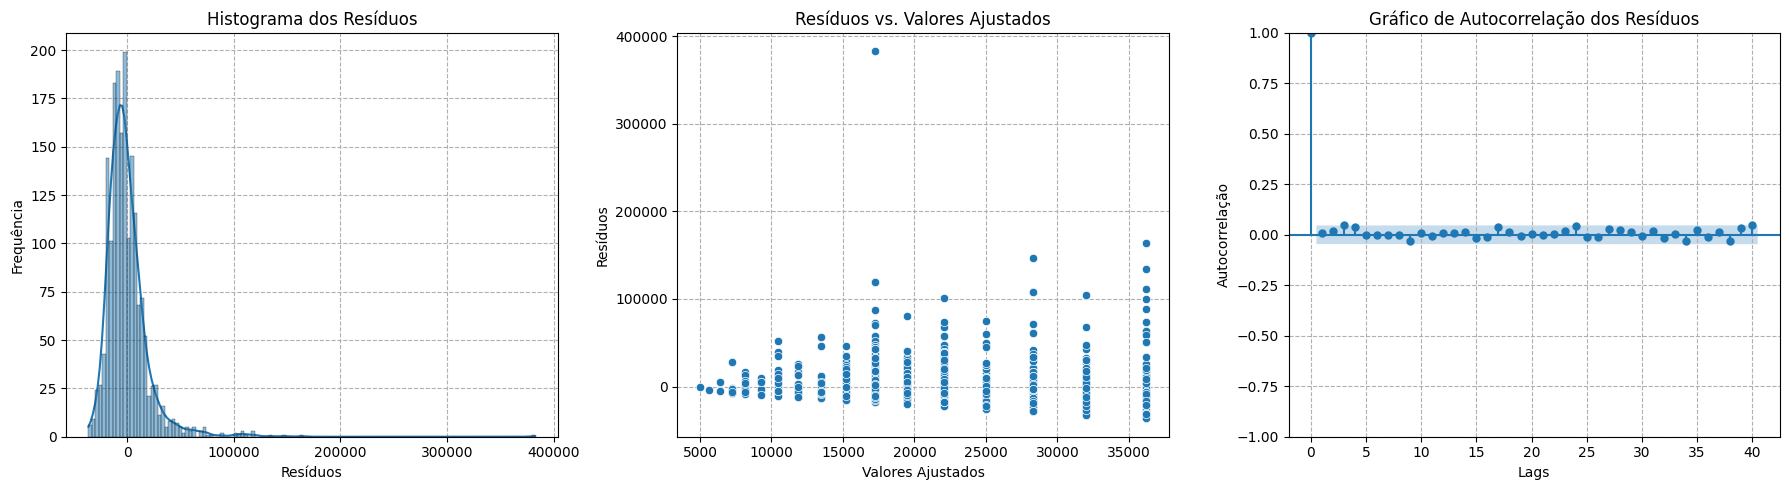

In [7]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

sns.histplot(gamma_model_ed.resid_response, kde=True, ax=ax[0], zorder=5)
ax[0].grid(zorder=0, linestyle='--')
ax[0].set_xlabel('Resíduos')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Histograma dos Resíduos')

sns.scatterplot(x=gamma_model_ed.fittedvalues, y=gamma_model_ed.resid_response, ax=ax[1], zorder=5)
ax[1].grid(zorder=0, linestyle='--')
ax[1].set_xlabel('Valores Ajustados')
ax[1].set_ylabel('Resíduos')
ax[1].set_title('Resíduos vs. Valores Ajustados')

# Gráfico de Autocorrelação
sm.graphics.tsa.plot_acf(gamma_model_ed.resid_response, lags=40, ax=ax[2])
ax[2].grid(zorder=0, linestyle='--')
ax[2].set_xlabel('Lags')
ax[2].set_ylabel('Autocorrelação')
ax[2].set_title('Gráfico de Autocorrelação dos Resíduos')

plt.tight_layout()
plt.savefig("../../images/models/gamma_model_edu.png")
plt.show()

In [8]:
X = data["male"]
X = sm.add_constant(X)

gamma_model_male = sm.GLM(target_adjusted, X, family=sm.families.Gamma(sm.families.links.Log())).fit()
print(gamma_model_male.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   earn   No. Observations:                 1814
Model:                            GLM   Df Residuals:                     1812
Model Family:                   Gamma   Df Model:                            1
Link Function:                    Log   Scale:                         0.94450
Method:                          IRLS   Log-Likelihood:                -19958.
Date:                Mon, 24 Jun 2024   Deviance:                       7770.3
Time:                        00:15:33   Pearson chi2:                 1.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1004
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6706      0.029    335.972      0.0

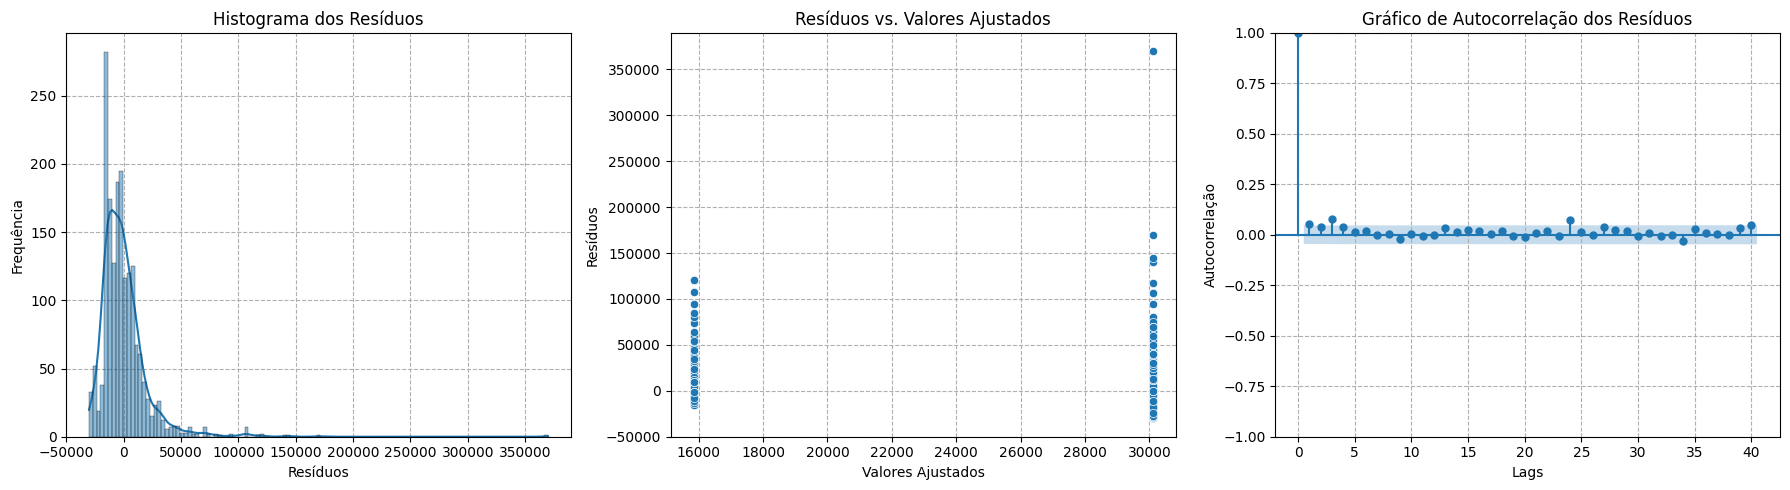

In [9]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

sns.histplot(gamma_model_male.resid_response, kde=True, ax=ax[0], zorder=5)
ax[0].grid(zorder=0, linestyle='--')
ax[0].set_xlabel('Resíduos')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Histograma dos Resíduos')

sns.scatterplot(x=gamma_model_male.fittedvalues, y=gamma_model_male.resid_response, ax=ax[1], zorder=5)
ax[1].grid(zorder=0, linestyle='--')
ax[1].set_xlabel('Valores Ajustados')
ax[1].set_ylabel('Resíduos')
ax[1].set_title('Resíduos vs. Valores Ajustados')

# Gráfico de Autocorrelação
sm.graphics.tsa.plot_acf(gamma_model_male.resid_response, lags=40, ax=ax[2])
ax[2].grid(zorder=0, linestyle='--')
ax[2].set_xlabel('Lags')
ax[2].set_ylabel('Autocorrelação')
ax[2].set_title('Gráfico de Autocorrelação dos Resíduos')

plt.tight_layout()
plt.savefig("../../images/models/gamma_model_male.png")
plt.show()

In [10]:
# Verificando a relação entre média e variância
grouped_data = data.groupby('male')['earn'].agg(['mean', 'var']).reset_index()
print(grouped_data)

   male          mean           var
0     0  15844.292982  2.407119e+08
1     1  30097.916914  8.336113e+08


## Interação entre covariáveis

In [11]:
X = data[["education", "male"]].copy()
X.loc[:, "education_male"] = X["education"] * X["male"]
X = sm.add_constant(X)

In [12]:
gamma_model_interaction = sm.GLM(target_adjusted, X, family=sm.families.Gamma(sm.families.links.Log())).fit()
print(gamma_model_interaction.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   earn   No. Observations:                 1814
Model:                            GLM   Df Residuals:                     1810
Model Family:                   Gamma   Df Model:                            3
Link Function:                    Log   Scale:                         0.89507
Method:                          IRLS   Log-Likelihood:                -20029.
Date:                Mon, 24 Jun 2024   Deviance:                       7591.0
Time:                        00:15:34   Pearson chi2:                 1.62e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1991
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.9086      0.152     52.

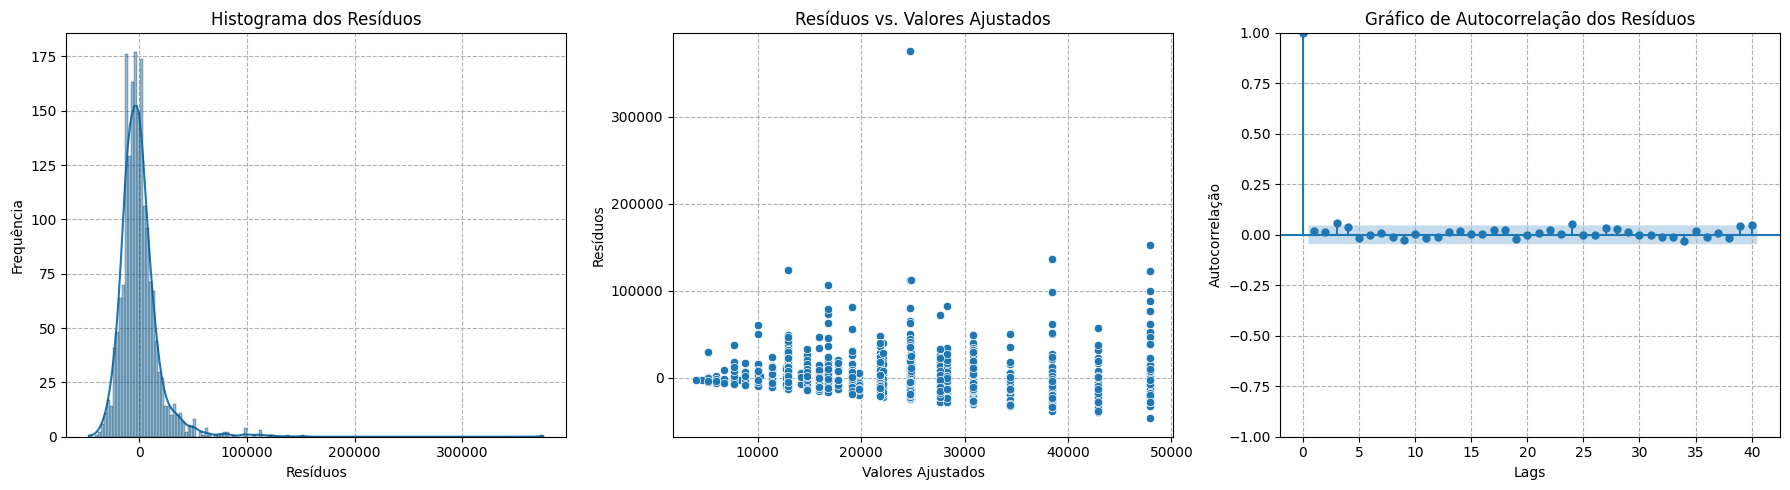

In [13]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

sns.histplot(gamma_model_interaction.resid_response, kde=True, ax=ax[0], zorder=5)
ax[0].grid(zorder=0, linestyle='--')
ax[0].set_xlabel('Resíduos')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Histograma dos Resíduos')

sns.scatterplot(x=gamma_model_interaction.fittedvalues, y=gamma_model_interaction.resid_response, ax=ax[1], zorder=5)
ax[1].grid(zorder=0, linestyle='--')
ax[1].set_xlabel('Valores Ajustados')
ax[1].set_ylabel('Resíduos')
ax[1].set_title('Resíduos vs. Valores Ajustados')

# Gráfico de Autocorrelação
sm.graphics.tsa.plot_acf(gamma_model_interaction.resid_response, lags=40, ax=ax[2])
ax[2].grid(zorder=0, linestyle='--')
ax[2].set_xlabel('Lags')
ax[2].set_ylabel('Autocorrelação')
ax[2].set_title('Gráfico de Autocorrelação dos Resíduos')

plt.tight_layout()
plt.savefig("../../images/models/gamma_model_interaction.png")
plt.show()

## Avaliação

### Bayesian Information Criterion (BIC)

In [14]:
print(f"BIC Modelo 1: {gamma_model_ed.bic}")
print(f"BIC Modelo 2: {gamma_model_male.bic}")
print(f"BIC Modelo 3: {gamma_model_interaction.bic}")

BIC Modelo 1: -5834.228420436815
BIC Modelo 2: -5825.646195432498
BIC Modelo 3: -5989.946874196537


/home/breno/Documentos/Statistical_Modeling/venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
